<a href="https://colab.research.google.com/github/aramakrishnan-006/pytorch-notebooks/blob/main/pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [50]:
#Generating the data points and adding some Gaussian Noise

N = 50

X = np.random.random(N)*10 - 5

# Slope of 0.5 & bias of -1
# MSE is the best loss function when using Gaussian noise
Y = 0.5 * X - 1 + np.random.randn(N)


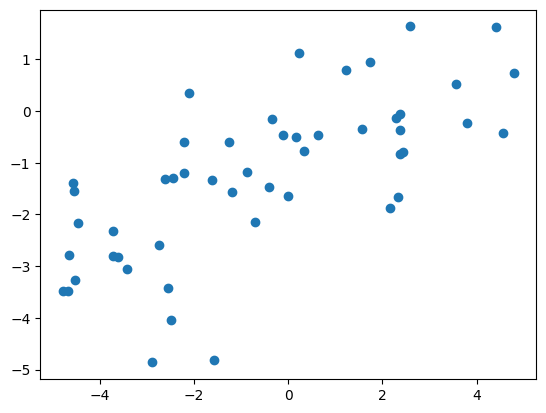

In [51]:
plt.scatter(X,Y)

In [52]:
# Creating the Linear Regression Model
# The 1, 1 indicates there are 1 input(s) and output(s)
model = nn.Linear(1, 1)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [53]:
# Need to reshape the data (num of samples x number of dimensions)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [54]:
#Change the inputs and outputs to float32 as that is default in pytorch
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [55]:
type(inputs)

torch.Tensor

In [56]:
#Training the Model
epochs = 15
losses = []

for i in range(epochs):
  #Zero the gradient as Pytorch stores it
  optimizer.zero_grad()

  #Train
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  #Store the Loss
  #This is a single number
  losses.append(loss.item())

  #Backward & Optimize
  #Gradients
  loss.backward()
  #1 step of gradient descent
  optimizer.step()

  print(f'Epoch {i + 1}/{epochs}, Loss is {loss.item():.3f}')

Epoch 1/15, Loss is 6.547
Epoch 2/15, Loss is 3.797
Epoch 3/15, Loss is 2.526
Epoch 4/15, Loss is 1.916
Epoch 5/15, Loss is 1.608
Epoch 6/15, Loss is 1.446
Epoch 7/15, Loss is 1.355
Epoch 8/15, Loss is 1.302
Epoch 9/15, Loss is 1.270
Epoch 10/15, Loss is 1.251
Epoch 11/15, Loss is 1.238
Epoch 12/15, Loss is 1.230
Epoch 13/15, Loss is 1.225
Epoch 14/15, Loss is 1.222
Epoch 15/15, Loss is 1.219


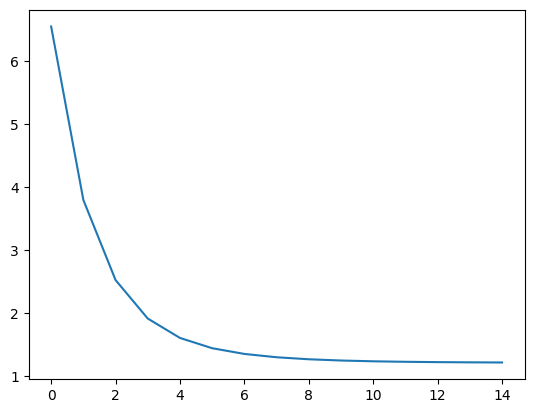

In [57]:
#Plotting the losses
plt.plot(losses)

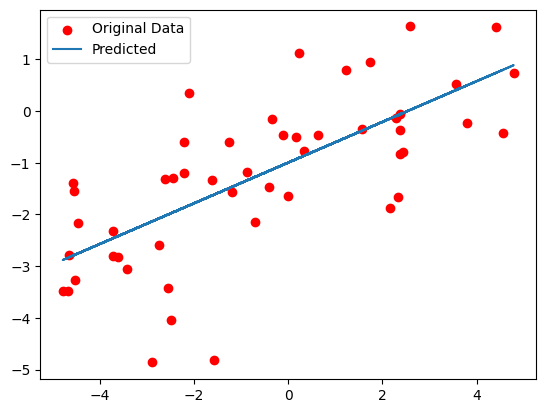

In [58]:
#Predict outputs based on inputs using the model

predict = model(inputs).detach().numpy()

# Plot the graph
plt.scatter(X, Y, label = 'Original Data', color='red')
plt.plot(X, predict, label = 'Predicted')

plt.legend()
plt.show()

In [59]:
with torch.no_grad():
  out = model(inputs).numpy()

out

array([[-2.0280392 ],
       [-2.8271234 ],
       [-1.9755533 ],
       [ 0.7373585 ],
       [-0.38469112],
       [-1.8672326 ],
       [-2.4629703 ],
       [-0.06722599],
       [-1.4953684 ],
       [-2.7885938 ],
       [-1.0008801 ],
       [-1.4675598 ],
       [ 0.49831432],
       [-0.040537  ],
       [-1.6161287 ],
       [ 0.02066141],
       [-2.7548232 ],
       [-0.9095936 ],
       [-2.0758862 ],
       [-2.4615142 ],
       [-0.14469254],
       [-0.07778436],
       [ 0.40728313],
       [-2.0026865 ],
       [-1.3380723 ],
       [-0.748435  ],
       [-1.955139  ],
       [-1.6329513 ],
       [-1.1289858 ],
       [-0.09991819],
       [-1.1563947 ],
       [-2.4215817 ],
       [ 0.8859497 ],
       [-0.31028843],
       [-2.7813082 ],
       [-0.06176424],
       [-2.1329858 ],
       [-2.8325734 ],
       [-1.8659449 ],
       [-1.2703414 ],
       [-0.5179142 ],
       [-2.3442802 ],
       [-2.8798485 ],
       [-0.9279264 ],
       [-0.06233048],
       [ 0

In [60]:
# Print the weights & Biases
weights = model.weight.data.numpy()
bias = model.bias.data.numpy()

#Note that the weights is a 2D array
print(f'Weights are {weights} & Biases are {bias}')

Weights are [[0.39332172]] & Biases are [-0.9976514]
